In [187]:
from bs4 import BeautifulSoup
import pandas as pd
import requests

In [54]:
html = requests.get('https://intothespiderverse.fandom.com/wiki/Category:Characters').text
soup1 = BeautifulSoup(html, 'html')
html = requests.get('https://intothespiderverse.fandom.com/wiki/Category:Characters?from=Peter+Parker+%28MK+I+Armor%29').text
soup2 = BeautifulSoup(html, 'html')

In [166]:
heroes = []
hrefs = []
for elem in (soup1.find_all('li', {'class': 'category-page__member'}) + soup2.find_all('li', {'class': 'category-page__member'})):
  heroes.append(elem.find('a', href=True)['title'])
  href = elem.find('a', href=True)['href']
  hrefs.append('https://intothespiderverse.fandom.com' + href)

In [226]:
urls = []
for index, elem in zip(range(len(hrefs)), hrefs):
  html = requests.get(elem).text
  soup = BeautifulSoup(html, 'html')
  try:
    url = (soup.find('figure', {'class': 'pi-item pi-image'})).find(src=True)['src']
  except:
    url = ''
  index_character = index + 1
  urls.append(url)

In [247]:
n = len(urls)
name_world = 'Человек-паук: Через вселенные'
poster = 'https://static.wikia.nocookie.net/intothespiderverse/images/2/22/Gwen-universe-with-talent_ver_1.png/revision/latest/scale-to-width-down/500?cb=20230527223604'
group = 'Мультфильмы'

frame = {
    'index_character': list(range(1,n+1)),
    'name': [name_world for _ in range(0, n)],
    'poster': [poster for _ in range(0, n)],
    'hero': heroes,
    'url': urls,
    'group': [group for _ in range(0, n)]
}

In [334]:
df = pd.DataFrame(frame)

In [335]:
df.to_csv('/content/drive/MyDrive/SpiderMan.csv')

In [302]:
df.head()

,index_character,name,poster,hero,url,group
0,1,Человек-паук: Через вселенные,https://static.wikia.nocookie.net/intothespide...,Aaron Davis (Earth-1610),https://static.wikia.nocookie.net/intothespide...,Мультфильмы
1,2,Человек-паук: Через вселенные,https://static.wikia.nocookie.net/intothespide...,Aaron Davis (Earth-199999),https://static.wikia.nocookie.net/intothespide...,Мультфильмы
2,3,Человек-паук: Через вселенные,https://static.wikia.nocookie.net/intothespide...,Aaron Davis (Earth-42),https://static.wikia.nocookie.net/intothespide...,Мультфильмы
3,4,Человек-паук: Через вселенные,https://static.wikia.nocookie.net/intothespide...,Abner Jenkins (Earth-1610),https://static.wikia.nocookie.net/intothespide...,Мультфильмы
4,5,Человек-паук: Через вселенные,https://static.wikia.nocookie.net/intothespide...,Adrian Toomes (Earth-42),,Мультфильмы


In [252]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [256]:
!cp /content/drive/MyDrive/dataHeroes.csv /content/

In [300]:
df1 = pd.read_csv('dataHeroes.csv', index_col = 'Unnamed: 0')

In [303]:
df1.head()

,index,index_character,index_world,name,poster,hero,url,group,Unnamed: 8,url_info,description
0,1,1,0,Создать,https://github.com/yupest/guess_who/blob/main/...,NaN,https://forms.gle/ezzDeRL6WM3gbXTr7,Все,NaN,NaN,NaN
1,2,1,0,Оценить,https://github.com/yupest/guess_who/blob/main/...,NaN,https://forms.gle/kx9hjRVi6KT9TyFg7,Все,NaN,NaN,NaN
2,1616,1,0,Помочь проекту,https://github.com/yupest/guess_who/blob/main/...,NaN,payment.html,Все,NaN,NaN,NaN
3,3,1,1,Наруто,https://c.wallhere.com/photos/d4/f4/Naruto_Shi...,Наруто,http://pm1.narvii.com/6922/d7d029f10750725a220...,Аниме,NaN,NaN,NaN
4,4,2,1,Наруто,https://c.wallhere.com/photos/d4/f4/Naruto_Shi...,Хината,https://wallup.net/wp-content/uploads/2019/09/...,Аниме,NaN,NaN,NaN


In [317]:
m = max(df1['index'])

In [318]:
print(m)

1616


In [328]:
df['index'] = [i for i in range(m+1, m+n+1)]
df['index_world'] = [max(df1['index_world']) + 1 for _ in range(n)]

In [329]:
result = pd.concat([df1,df],ignore_index=True)

In [330]:
result.tail()

,index,index_character,index_world,name,poster,hero,url,group,Unnamed: 8,url_info,description
1776,1876,260,24,Человек-паук: Через вселенные,https://static.wikia.nocookie.net/intothespide...,Weber,https://static.wikia.nocookie.net/intothespide...,Мультфильмы,NaN,NaN,NaN
1777,1877,261,24,Человек-паук: Через вселенные,https://static.wikia.nocookie.net/intothespide...,Wilson Fisk (Earth-138),https://static.wikia.nocookie.net/intothespide...,Мультфильмы,NaN,NaN,NaN
1778,1878,262,24,Человек-паук: Через вселенные,https://static.wikia.nocookie.net/intothespide...,Wilson Fisk (Earth-1610),https://static.wikia.nocookie.net/intothespide...,Мультфильмы,NaN,NaN,NaN
1779,1879,263,24,Человек-паук: Через вселенные,https://static.wikia.nocookie.net/intothespide...,WM-bees,https://static.wikia.nocookie.net/intothespide...,Мультфильмы,NaN,NaN,NaN
1780,1880,264,24,Человек-паук: Через вселенные,https://static.wikia.nocookie.net/intothespide...,Yuri Watanabe (Earth-65),https://static.wikia.nocookie.net/intothespide...,Мультфильмы,NaN,NaN,NaN


In [331]:
result.to_csv('/content/drive/MyDrive/dataHeroes.csv')

Text(0.5, 0, 'Количество персонажей')

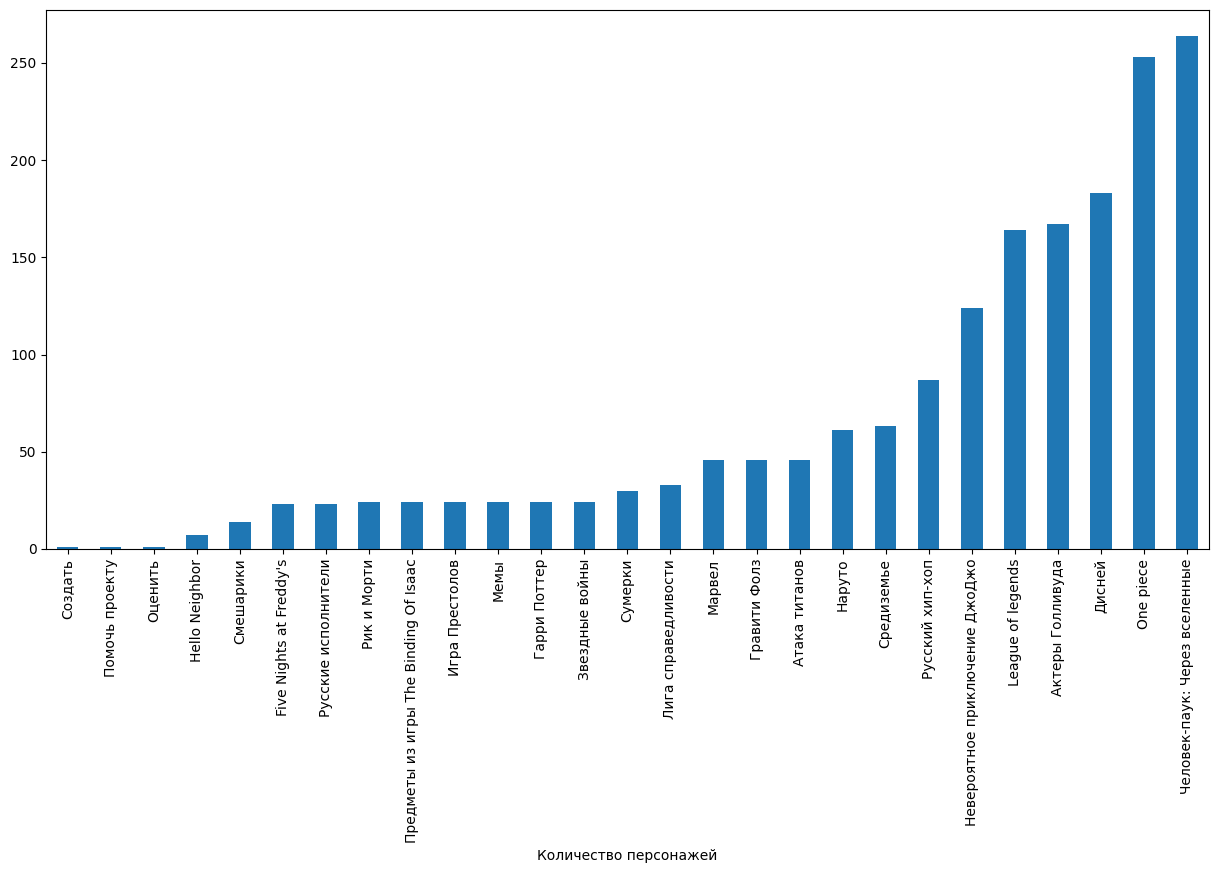

In [341]:
ax = result.groupby(['name']).size().sort_values().plot(kind='bar',figsize=(15,7))
ax.set_xlabel("Количество персонажей")

In [350]:
from urllib.parse import urlparse

<Axes: >

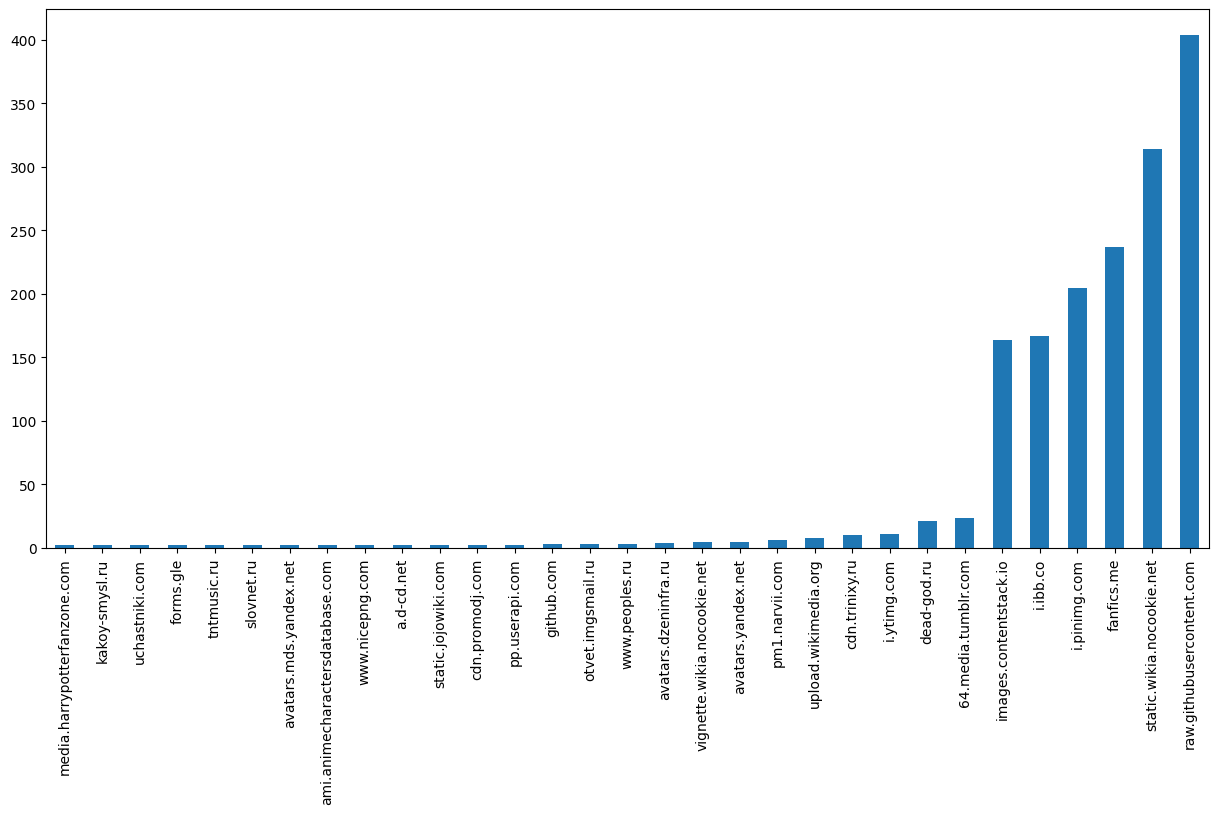

In [384]:
count_urls = result.url[result.url != ''].apply(lambda x: urlparse(x).netloc).value_counts()
count_urls[(count_urls > 1) & (count_urls != '')].sort_values().plot(kind='bar',figsize=(15,7))

In [464]:
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt

In [495]:

worlds = widgets.Dropdown(
    options=[('Группа', 'group'), ('Мир', 'name')],
    description='Выбор: ',
    disabled=False,
)

output = widgets.Output()
display(worlds, output)


def on_value_change(change):
  res = result.groupby(change['new']).size().sort_values()
  with output:
    output.clear_output()
    plt.bar(res.index.tolist(), res.values.tolist())
    plt.xticks(rotation=90)
    plt.show()
worlds.observe(on_value_change, names='value')

Dropdown(description='Выбор: ', options=(('Группа', 'group'), ('Мир', 'name')), value='group')

Output()